In [1]:
#-----------WARNING-----------WARNING-----------WARNING-----------WARNING-----------WARNING-----------WARNING
#Running the whole notebook without a GPU, CUDA, CUDNN, and Tensorflow-GPU may take 8+ hours of compiling per model
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

%matplotlib inline

Using TensorFlow backend.


In [2]:
# get all the data in the directory split/test, and reshape them
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        'Images/DATASET/TEST', 
        target_size=(224, 224), 
        batch_size = 850, 
        seed = 1234) 

Found 2513 images belonging to 2 classes.


In [3]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        'Images/DATASET/TRAIN', 
        target_size=(224, 224), 
        batch_size = 8500, 
        seed = 1234) 

Found 22564 images belonging to 2 classes.


In [4]:
#split images and labels
images_train, labels_train = next(data_train)
images_test, labels_test= next(data_test)

In [5]:
#Merging all images and labels
images = np.concatenate((images_train, images_test))
labels = np.concatenate((labels_train[:,0], labels_test[:,0]))

In [6]:
#Creating Random Split for test data
X_model, X_test, y_model, y_test = train_test_split(images, labels, test_size=0.20, random_state=1234)

#Creating Random Split for validation and training data
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=1234)

In [7]:
#Creating Convolutional Neural Network
cnn = models.Sequential()

#1st Layer
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3), padding='SAME'))
cnn.add(layers.MaxPooling2D((2, 2)))

#2nd Layer
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))

#Output Layer
cnn.add(layers.Dense(1, activation='sigmoid'))

#Configuring CNN
cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
#Training CNN
cnn1 = cnn.fit(X_train,
               y_train,
               epochs=50,
               batch_size=32,
               validation_data=(X_val, y_val))


Train on 5984 samples, validate on 1496 samples
Epoch 1/50
5984/5984 [==============================] - 13s 2ms/step - loss: 0.5232 - acc: 0.7537 - val_loss: 0.4445 - val_acc: 0.8041
Epoch 2/50
5984/5984 [==============================] - 11s 2ms/step - loss: 0.4573 - acc: 0.7904 - val_loss: 0.4644 - val_acc: 0.8001
Epoch 3/50
5984/5984 [==============================] - 11s 2ms/step - loss: 0.4451 - acc: 0.8030 - val_loss: 0.4174 - val_acc: 0.8215
Epoch 4/50
5984/5984 [==============================] - 11s 2ms/step - loss: 0.4242 - acc: 0.8192 - val_loss: 0.3998 - val_acc: 0.8429
Epoch 5/50
5984/5984 [==============================] - 11s 2ms/step - loss: 0.4134 - acc: 0.8242 - val_loss: 0.3908 - val_acc: 0.8336
Epoch 6/50
5984/5984 [==============================] - 11s 2ms/step - loss: 0.4055 - acc: 0.8287 - val_loss: 0.3931 - val_acc: 0.8429
Epoch 7/50
5984/5984 [==============================] - 11s 2ms/step - loss: 0.3915 - acc: 0.8354 - val_loss: 0.3820 - val_acc: 0.8382
Epoch 

In [9]:
#CNN Model Summary
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 96800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                3097632   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

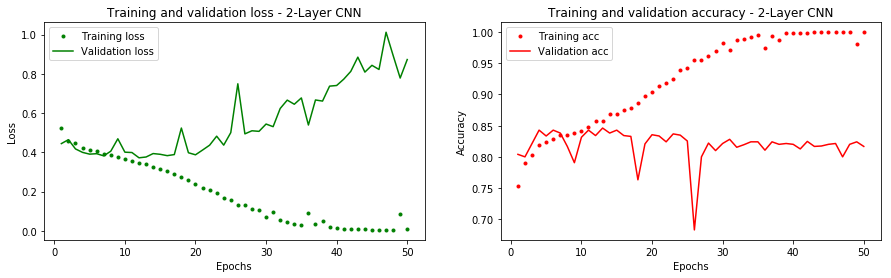

In [10]:
#Extracting CNN Results for Visualization
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()

In [11]:
#CNN Metrics
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print()
print('CNN [Loss, Accuracy]')
print('CNN TRAIN IMAGES: ', results_train)
print()
print('CNN TEST IMAGES: ', results_test)

1870/1870 [==============================] - 1s 654us/step

CNN [Loss, Accuracy]
CNN TRAIN IMAGES:  [0.005071265001987969, 0.9996657754010695]

CNN TEST IMAGES:  [0.9345438659350502, 0.802673796600199]


## 2-Layer CNN with Transfer Learning (InceptionV3)

In [12]:
#Importing model with weights pre-trained on ImageNet
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [13]:
#Utilizing InceptionV3 for new CNN
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
cnn2 = models.Sequential()
cnn2.add(imagenet)
cnn2.add(GlobalAveragePooling2D())
cnn2.add(Dense(1024,activation='relu'))
cnn2.add(Dense(1024,activation='relu')) #dense layer 2
cnn2.add(Dense(512,activation='relu')) #dense layer 3
cnn2.add(Dense(1,activation='sigmoid')) #final layer with softmax activation

In [14]:
#Ensuring exracted model is not retrained
for layer in cnn2.layers[:1]:
    layer.trainable=False

In [15]:
cnn2.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

tl_cnn2 = cnn2.fit(X_train,
                   y_train,
                   epochs=10,
                   batch_size=50,
                   validation_data=(X_val, y_val))

Train on 5984 samples, validate on 1496 samples
Epoch 1/10
5984/5984 [==============================] - 20s 3ms/step - loss: 0.3736 - acc: 0.8376 - val_loss: 0.1997 - val_acc: 0.9238
Epoch 2/10
5984/5984 [==============================] - 15s 2ms/step - loss: 0.2428 - acc: 0.9037 - val_loss: 0.2279 - val_acc: 0.9071
Epoch 3/10
5984/5984 [==============================] - 14s 2ms/step - loss: 0.2522 - acc: 0.8969 - val_loss: 0.2231 - val_acc: 0.9124
Epoch 4/10
5984/5984 [==============================] - 14s 2ms/step - loss: 0.2045 - acc: 0.9143 - val_loss: 0.2462 - val_acc: 0.9057
Epoch 5/10
5984/5984 [==============================] - 15s 2ms/step - loss: 0.1829 - acc: 0.9258 - val_loss: 0.4317 - val_acc: 0.8777
Epoch 6/10
5984/5984 [==============================] - 15s 2ms/step - loss: 0.1756 - acc: 0.9288 - val_loss: 0.1985 - val_acc: 0.9278
Epoch 7/10
5984/5984 [==============================] - 14s 2ms/step - loss: 0.1762 - acc: 0.9243 - val_loss: 0.4944 - val_acc: 0.8463
Epoch 8

In [16]:
cnn2.evaluate(X_test, y_test)

1870/1870 [==============================] - 5s 2ms/step


[0.33803447143916776, 0.8989304810921777]

In [17]:
predictions_transfer = cnn2.predict(X_test)
predictions_transfer = np.around(predictions_transfer)

In [18]:
f1_score(y_test, predictions_transfer)

0.9136592051164916

In [19]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 681  157]
 [  32 1000]]


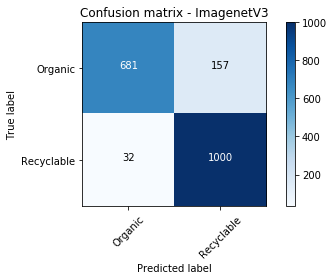

In [20]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions_transfer), classes=['Organic', 'Recyclable'], normalize=False,
                      title='Confusion matrix - ImagenetV3')
# plt.savefig('Images/Model/CF_TL1.png')
plt.show()

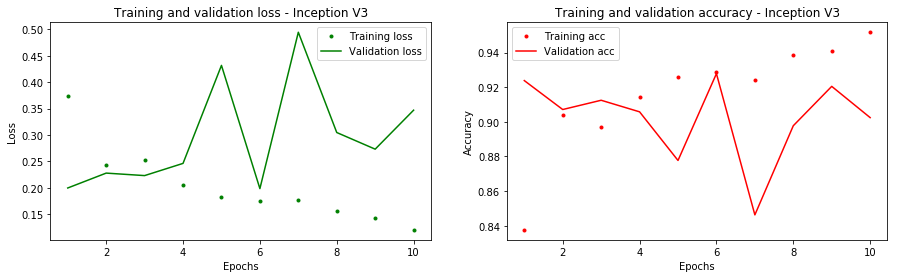

In [21]:
#Extracting CNN Results for Visualization
hist_cnn = tl_cnn2.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - Inception V3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - Inception V3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn2.png')
plt.show()

In [22]:
def predictoneimage_cnn(model, path):
    img = load_img(path, target_size=(224, 224))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    predict = model.predict(img)
    return predict

array([[0.98879147]], dtype=float32)

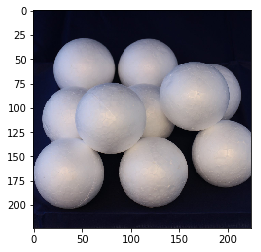

In [23]:
predictoneimage_cnn(cnn2, 'Images/Sample_Images/styro.jpg')

array([[0.09058155]], dtype=float32)

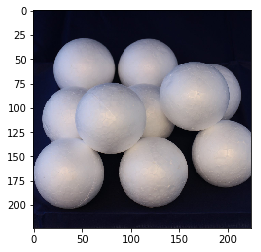

In [24]:
predictoneimage_cnn(cnn, 'Images/Sample_Images/styro.jpg')

In [25]:
#Saving Models
# cnn.save('image_class1.h5')
# cnn2.save('image_class1_tl.h5')

## 3 Layer CNN

In [26]:
cnn3 = models.Sequential()

#1st Layer
cnn3.add(layers.Conv2D(128, (3, 3), input_shape=(224, 224,  3), padding='SAME'))
cnn3.add(layers.Activation('relu'))
cnn3.add(layers.MaxPooling2D(pool_size=(2, 2)))

#2nd Layer
cnn3.add(layers.Conv2D(64, (3, 3)))
cnn3.add(layers.Activation('relu'))
cnn3.add(layers.MaxPooling2D(pool_size=(2, 2)))

#3rd Layer
cnn3.add(layers.Conv2D(32, (3, 3)))
cnn3.add(layers.Activation('relu'))
cnn3.add(layers.MaxPooling2D(pool_size=(2, 2)))

#Dense and output Layers
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(32))
cnn3.add(layers.Activation('relu'))
cnn3.add(layers.Dropout(0.5))
cnn3.add(layers.Dense(1))
cnn3.add(layers.Activation('sigmoid'))

#Configuring the model
cnn3.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
cnn_3l = cnn3.fit(X_train,
                  y_train,
                  epochs=50,
                  batch_size=32,
                  validation_data=(X_val, y_val))

Train on 5984 samples, validate on 1496 samples
Epoch 1/50
5984/5984 [==============================] - 23s 4ms/step - loss: 0.5626 - acc: 0.7465 - val_loss: 0.4459 - val_acc: 0.8329
Epoch 2/50
5984/5984 [==============================] - 21s 3ms/step - loss: 0.4767 - acc: 0.8142 - val_loss: 0.4396 - val_acc: 0.8082
Epoch 3/50
5984/5984 [==============================] - 21s 3ms/step - loss: 0.4482 - acc: 0.8234 - val_loss: 0.4142 - val_acc: 0.8362
Epoch 4/50
5984/5984 [==============================] - 21s 3ms/step - loss: 0.4239 - acc: 0.8314 - val_loss: 0.4097 - val_acc: 0.8262
Epoch 5/50
5984/5984 [==============================] - 21s 3ms/step - loss: 0.3984 - acc: 0.8396 - val_loss: 0.3931 - val_acc: 0.8396
Epoch 6/50
5984/5984 [==============================] - 21s 3ms/step - loss: 0.3757 - acc: 0.8504 - val_loss: 0.3886 - val_acc: 0.8309
Epoch 7/50
5984/5984 [==============================] - 21s 3ms/step - loss: 0.3639 - acc: 0.8553 - val_loss: 0.3339 - val_acc: 0.8570
Epoch 8

In [28]:
print(cnn3.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_97 (Conv2D)           (None, 224, 224, 128)     3584      
_________________________________________________________________
activation_95 (Activation)   (None, 224, 224, 128)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 112, 112, 128)     0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 110, 110, 64)      73792     
_________________________________________________________________
activation_96 (Activation)   (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 53, 53, 32)       

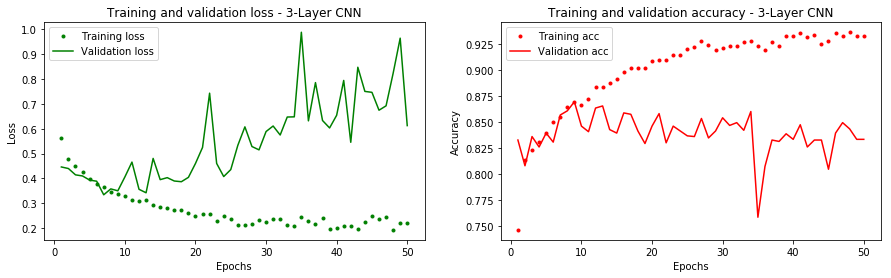

In [29]:
#Extracting CNN Results for Visualization
hist_cnn = cnn_3l.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 3-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 3-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn3.png')
plt.show()

In [30]:
# cnn3.save('image_class2_3l.h5')

## 3-Layer CNN with Transfer Learning (Xception)

In [31]:
#Importing pre-trained model
from keras.applications import xception

In [32]:
#Creating pre-trained CNN Model
imagenet2 = xception.Xception(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
imagenet2_res = imagenet2.output
cnn3_tl = models.Sequential()
cnn3_tl.add(imagenet2)
cnn3_tl.add(GlobalAveragePooling2D())
cnn3_tl.add(Dense(1024,activation='relu'))
cnn3_tl.add(Dense(1024,activation='relu')) 
cnn3_tl.add(Dense(512,activation='relu')) 
cnn3_tl.add(Dense(1,activation='sigmoid'))

In [33]:
#Ensuring exracted model is not retrained
for layer in cnn3_tl.layers[:1]:
    layer.trainable=False

In [34]:
cnn3_tl.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

tl_cnn3 = cnn3_tl.fit(X_train,
                      y_train,
                      epochs=10,
                      batch_size=50,
                      validation_data=(X_val, y_val))

Train on 5984 samples, validate on 1496 samples
Epoch 1/10
5984/5984 [==============================] - 31s 5ms/step - loss: 0.2991 - acc: 0.8783 - val_loss: 0.4217 - val_acc: 0.8676
Epoch 2/10
5984/5984 [==============================] - 26s 4ms/step - loss: 0.2018 - acc: 0.9225 - val_loss: 0.2261 - val_acc: 0.9205
Epoch 3/10
5984/5984 [==============================] - 25s 4ms/step - loss: 0.1726 - acc: 0.9313 - val_loss: 0.2636 - val_acc: 0.8984
Epoch 4/10
5984/5984 [==============================] - 25s 4ms/step - loss: 0.1293 - acc: 0.9485 - val_loss: 0.3022 - val_acc: 0.9031
Epoch 5/10
5984/5984 [==============================] - 26s 4ms/step - loss: 0.1227 - acc: 0.9557 - val_loss: 0.2324 - val_acc: 0.9178
Epoch 6/10
5984/5984 [==============================] - 25s 4ms/step - loss: 0.0889 - acc: 0.9651 - val_loss: 0.2759 - val_acc: 0.9178
Epoch 7/10
5984/5984 [==============================] - 25s 4ms/step - loss: 0.0687 - acc: 0.9718 - val_loss: 0.3233 - val_acc: 0.9057
Epoch 8

In [35]:
print(cnn3_tl.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 24,534,569
Trainable params: 3,673,089
Non-trainable params: 20,861,480
__________________________________

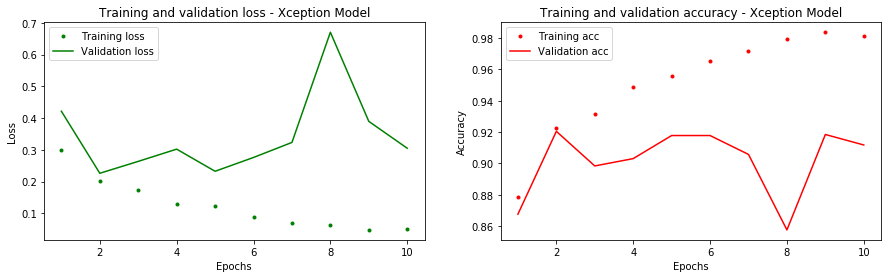

In [36]:
#Extracting CNN Results for Visualization
hist_cnn = tl_cnn3.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - Xception Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn3_tl.png')
plt.show()

array([[0.11355274]], dtype=float32)

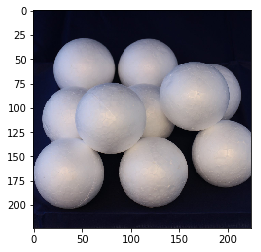

In [37]:
#Check if it can classify a confusing image of styrofoam ball
predictoneimage_cnn(cnn3_tl, 'Images/Sample_Images/styro.jpg')

array([[7.0908723e-06]], dtype=float32)

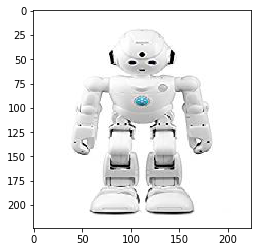

In [38]:
#Checking the Robot
predictoneimage_cnn(cnn3_tl, 'Images/Sample_Images/robot.jpg')

In [39]:
# cnn3_tl.save('image_class2_3l_tl.h5')

In [40]:
def image_predictor(path):
    img = load_img(path, target_size=(224, 224))
    plt.imshow(img)
    img = img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)    
    pred1 = cnn.predict(img)
    pred2 = cnn3.predict(img)
    pred3 = cnn2.predict(img)
    pred4 = cnn3_tl.predict(img)
    return pred1, pred2, pred3, pred4

In [41]:
def predictor_output(path):
    mod1, mod2, mod3, mod4 = image_predictor(path)
    print('VALUE Interpretation:')
    print()
    print('Closer to 1 is Organic, Closer to 0 is Recyclable')
    print()
    print('2-LAYER CNN:')
    print(mod1)
    print()
    print('3-Layer CNN:')
    print(mod2)
    print()
    print('Inception ver3 CNN')
    print(mod3)
    print()
    print('Xception CNN')
    print(mod4)

VALUE Interpretation:

Closer to 1 is Organic, Closer to 0 is Recyclable

2-LAYER CNN:
[[0.00080935]]

3-Layer CNN:
[[0.13352805]]

Inception ver3 CNN
[[0.0008682]]

Xception CNN
[[7.0908723e-06]]


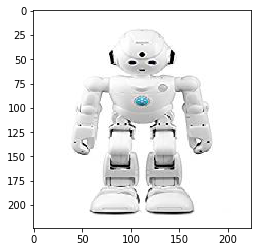

In [42]:
#Sample Prediction
predictor_output('Images/Sample_Images/robot.jpg')